# Titanic Dataset

## Overview
The Titanic dataset is one of the most famous datasets for practicing binary classification and data exploration. It provides information about the passengers of the RMS Titanic, which sank on its maiden voyage in 1912.

## Dataset Information
The dataset includes the following key features:

| Column Name       | Description                                                                                 |
|-------------------|---------------------------------------------------------------------------------------------|
| **PassengerId**   | Unique identifier for each passenger.                                                      |
| **Survived**      | Binary indicator of survival: `1` = survived, `0` = did not survive (target variable).      |
| **Pclass**        | Passenger's class: `1` = 1st, `2` = 2nd, `3` = 3rd class.                                  |
| **Name**          | Full name of the passenger.                                                                |
| **Sex**           | Gender of the passenger (`male` or `female`).                                              |
| **Age**           | Age of the passenger (in years).                                                           |
| **SibSp**         | Number of siblings/spouses aboard the Titanic with the passenger.                          |
| **Parch**         | Number of parents/children aboard the Titanic with the passenger.                          |
| **Ticket**        | Ticket number.                                                                             |
| **Fare**          | Ticket price (in British pounds).                                                          |
| **Cabin**         | Cabin number (if known).                                                                   |
| **Embarked**      | Port of embarkation: `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton.                 |

## Key Insights for Analysis
1. **Survival Rate Analysis**:
   - What factors influenced survival? E.g., gender, age, class.
   - Women and children are hypothesized to have higher survival rates ("Women and children first").

2. **Socioeconomic Status**:
   - Does passenger class (`Pclass`) correlate with survival?
   - Higher-class passengers often had better access to lifeboats.

3. **Family Connections**:
   - Does traveling with family (siblings, spouses, parents, children) improve survival odds?

4. **Embarkation and Fare**:
   - Were survival rates affected by the port of embarkation or the ticket fare?

## Challenges
- Missing data in `Age` and `Cabin` columns.
- Need to preprocess data (e.g., encode categorical variables like `Sex` and `Embarked`).

## Useful Links
- Kaggle Titanic Dataset: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)



In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [103]:
train_df = pd.read_csv("train.csv") # Import training csv
test_df = pd.read_csv("test.csv")   # Import test csv
gender_df = pd.read_csv("gender_submission.csv")  # import gender csv

In [104]:
training_null_values = train_df.isnull().sum()  # Check for null values in train dataframe
train_df  # Display dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
print("Null Values: ", train_df.isnull().sum())

Null Values:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



## Number of Null values

*   There are **687** null values in Cabin number values
*   There are **177** null values in Age values
*   There are **2** null values in Embarkation location




## Possibly useful variables:

*   PClass - Passenger's class: **1 = 1st** , **2 = 2nd** , **3 = 3rd** class.
*   Survived - Binary indicator of survival: **1 = survived** , **0 = did not survive** (target variable).
*   Sex - Gender of the passenger (**male** or **female**).
*   Age - Age of the passenger (**in years**).
*   Number of **siblings/spouses** aboard the Titanic with the passenger.
* Parch -	Number of **parents/children** aboard the Titanic with the passenger.
* Cabin Number - **Cabin number** (if known).
* Embarked - Port of embarkation: **C = Cherbourg**, **Q = Queenstown**, **S = Southampton**.

* SibSp	- Number of **siblings/spouses** aboard the Titanic with the passenger.

Although these are the variables I am suggesting, this does not neccessarily mean that the other ones are not useful. Exploratory data analysis is required for the all the features do discover correlations between different data types

## Dealing with missing values

There are **891** rows in the training dataset. At approximately 90% of them are missing cabin values. Due to this I recommend we remove drop this column as too many values are missing and the only possible alternative is to delete the rows with missing values but that is highly impractical when more than half of them are missing and the dataset isn't that high to begin with.

In [106]:
"""

In this code block we create a new dataframe: new_train_df

This dataframe does not have Cabin column that the "train_df" has

"""

columns = train_df.columns.tolist() # Get list of columns from dataframe object

cabin_index = columns.index("Cabin") # Get the index position of cabin

# basically create a list of columns we want in our dataframe and exclude the cabin column
columns_to_include = [i for i in range(len(columns)) if i != cabin_index]

new_train_df = train_df.iloc[:, columns_to_include]
new_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Dealing with missing values continued

Ok now that we have dealt with the missing null values for cabin we need to fill in the missing null values for age.

There are 2 options:

* Average - Average incorporates all data points and represents the central tendency of the dataset but it is easily swayed by outliers.
* Median - Median is not affected by outliers/extreeme values. It is ideal for datasets with a skewed distribution and is very robust against outliers.

Let's take a look at the data first before we decide

In [121]:
columns = train_df.columns.tolist()
columns.pop(10) # Remove Cabin column

new_train_df = train_df[train_df['Age'].notna()][columns] # Get the data that has no  na values in the age category
new_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


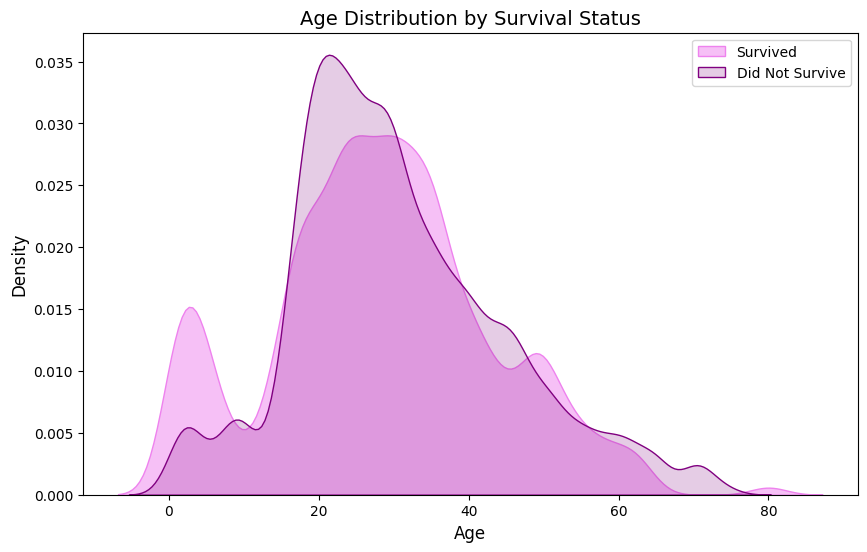

In [137]:
# Filter data by Survived
survived_df = train_df[train_df['Survived'] == 1]
not_survived_df = train_df[train_df['Survived'] == 0]

# Plot KDE for both groups on the same graph
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=survived_df,
    x='Age',
    bw_adjust=0.5,
    fill=True,
    alpha=0.5,
    label='Survived',
    color='violet'
)
sns.kdeplot(
    data=not_survived_df,
    x='Age',
    bw_adjust=0.5,
    fill=True,
    alpha=0.2,
    label='Did Not Survive',
    color='purple'
)

# Customize plot
plt.title("Age Distribution by Survival Status", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(visible=False)
plt.show()


In [130]:
new_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

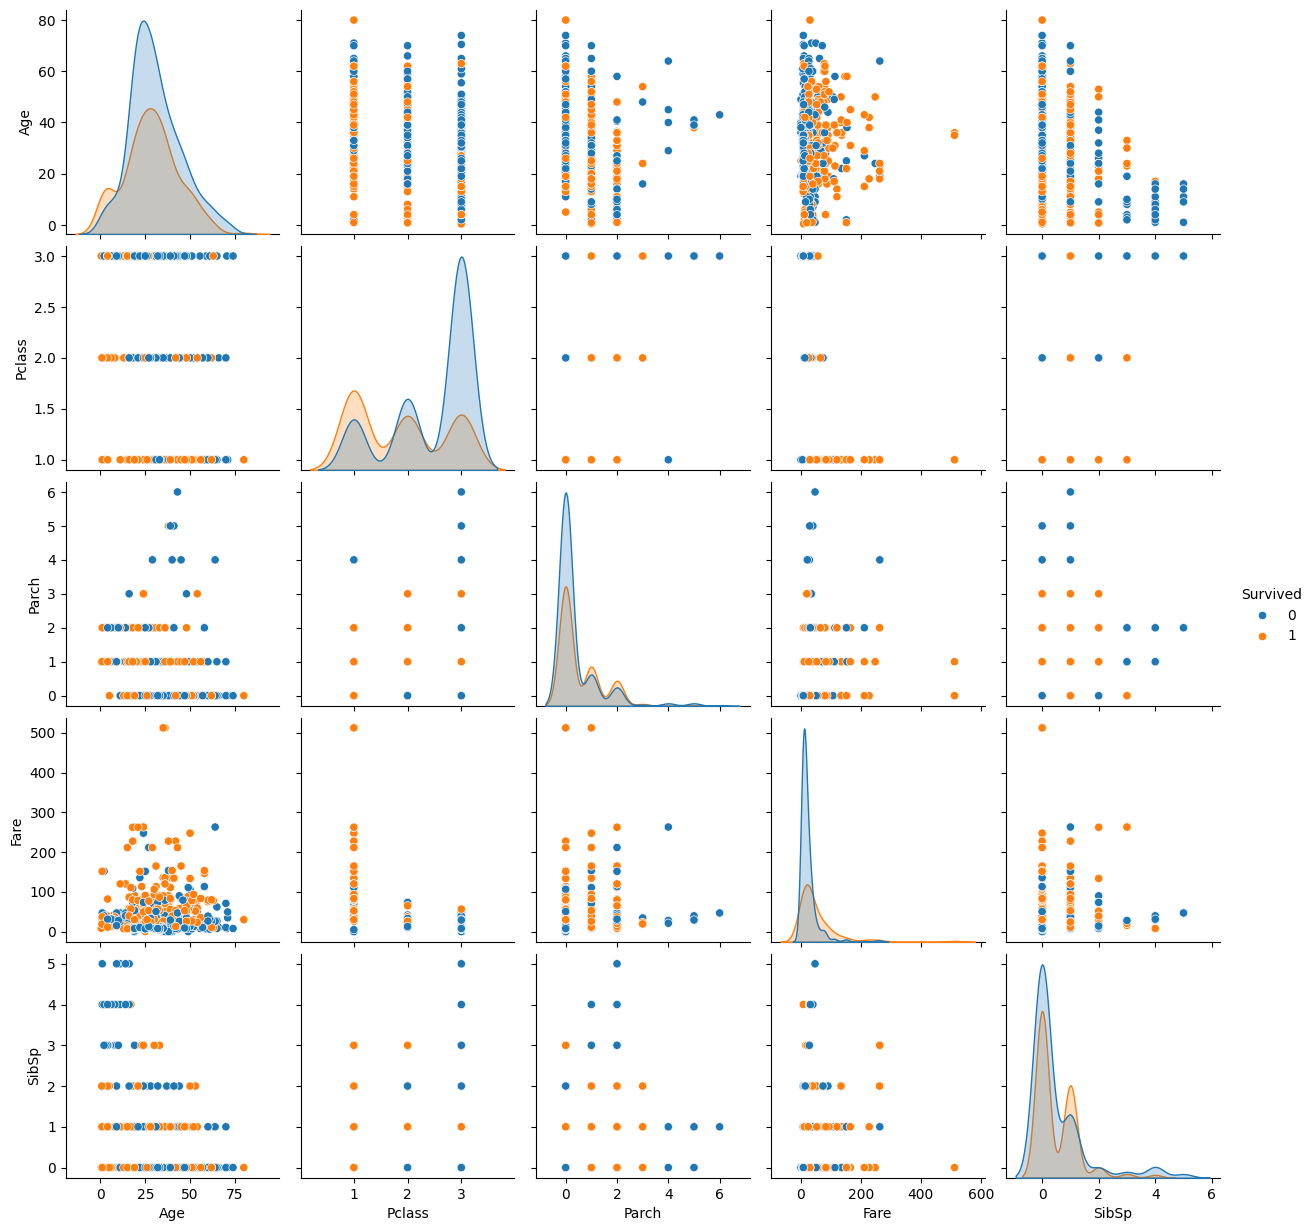

In [133]:
# This code block will plot the relevant graphs for those who survived and those who did not.
# Bell curve is useful for distribution analysis but will only work for values where the number shown has meaning (age, class)


features = ["Age", "Pclass", "Parch", "Embarked", "Fare", "SibSp", 'Survived']

sns.pairplot(new_train_df[features], hue='Survived')

plt.show()

The plots are quite useful but we can't visualize the gender difference in survivors. Let's change the **"male"**, **"female"** to **0** and **1** and do the same with the embarkation ports

* male -> 0
* female -> 1
* C -> 1
* Q -> 2
* S -> 3.

In [144]:
new_train_df["Sex"] = new_train_df['Sex'].replace({'male': 0, 'female': 1}) # replace the male and female values with 0s and 1s
new_train_df['Embarked'] = new_train_df['Embarked'].replace({'C': 1, 'Q': 2, 'S': 3}) # replace embarkation locations with numbers

Now lets try show the pair plots again

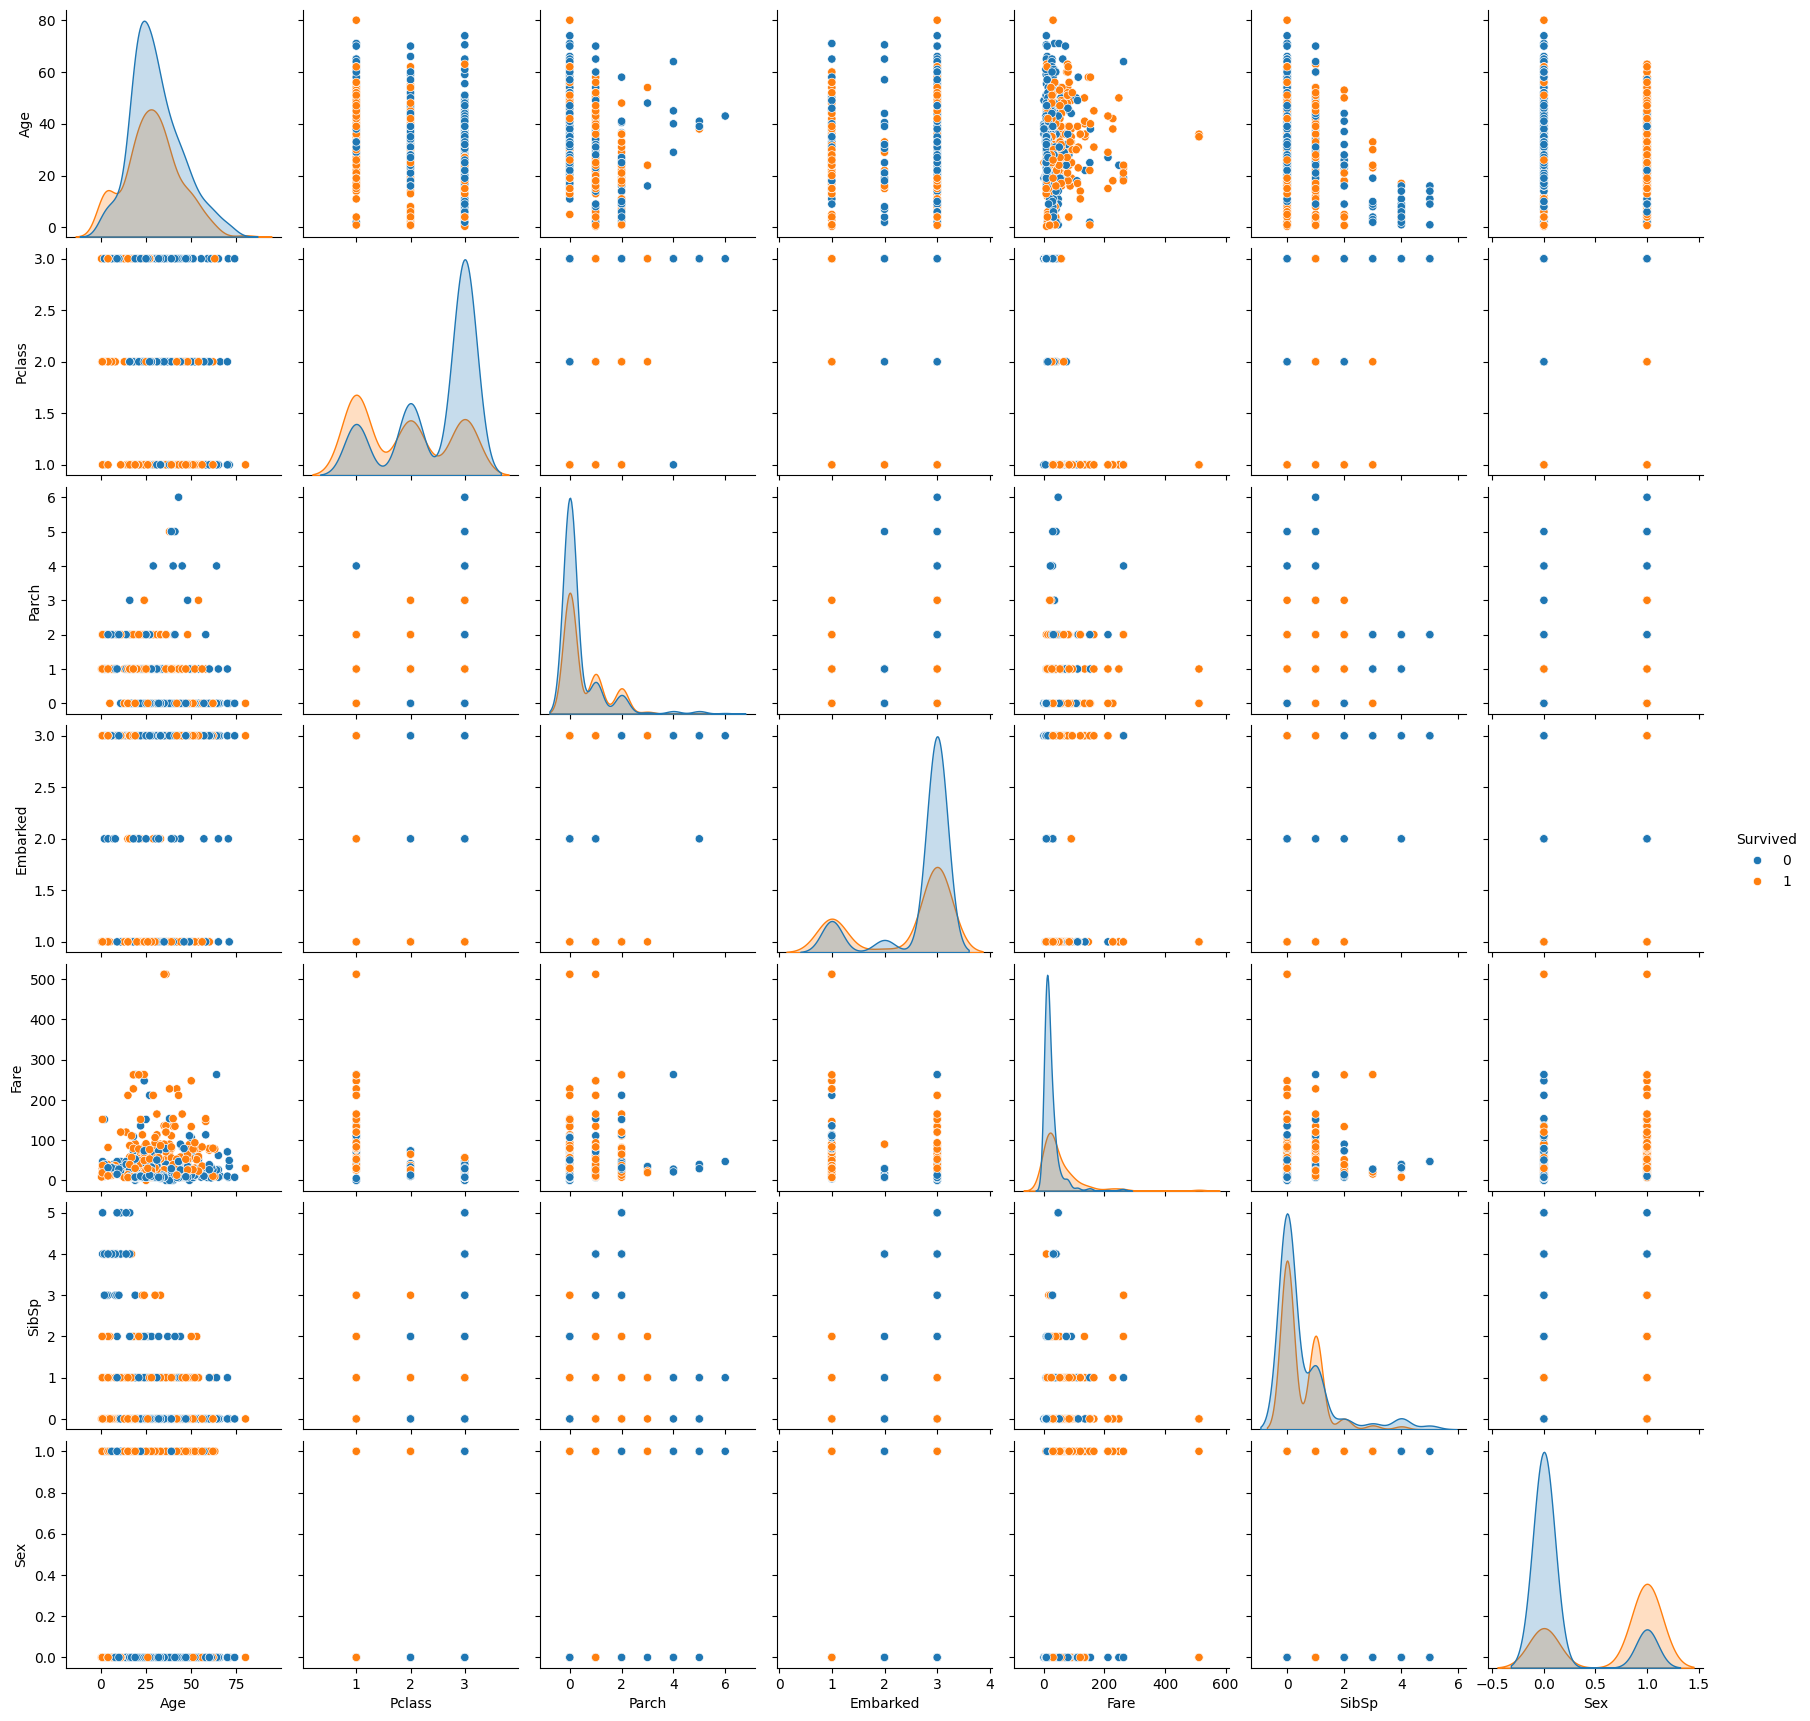

In [145]:

features = ["Age", "Pclass", "Parch", "Embarked", "Fare", "SibSp", 'Survived', "Sex"]

sns.pairplot(new_train_df[features], hue='Survived')

plt.show()

# Important points to consider

* Features or variables like fares, class, and embarkation location could be skewed in their representation. Less people are likely to pay the more expensive fares just like less people pay for business and first class tickets. There is both a lower capacity and lower demand for such. embarkation location could be skewed as a mere coincidence and so it is possible it is not a good predictor for survival rate. Class is similar to fare (I assume class partially determines fare but we will see using the correlation matrix if possible).
* Skewed features are bad because they could bias the model towards specific predictions for the area or class concerned. This si something to pay attention to during model training should we decide to include the skewed classes.

In [153]:
new_train_df['Embarked'].value_counts()

,count
Embarked,
3.0,554
1.0,130
2.0,28


In [154]:
new_train_df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


In [109]:
# Continue data analysis tommorow
